<a href="https://colab.research.google.com/github/orizay/free-fonts/blob/master/01_%EC%9B%B9%EC%97%90%EC%84%9C_%EC%A3%BC%EB%AC%B8%EC%88%98%EB%A5%BC_%EB%B6%84%EC%84%9D%ED%95%98%EB%8A%94_%ED%85%8C%ED%81%AC%EB%8B%8910.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 웹에서 주문 수를 분석하는 테크닉 10
- 테크닉1_데이터를 읽어 들이자
- 테크닉2_데이터를 결합(유니언)해 보자
- 테크닉3_매출 데이터끼리 결합(조인)해 보자
- 테크닉4_마스터데이터를 결합(조인)해 보자
- 테크닉5_필요한 데이터 커럼을 만들자
- 테크닉6_데이터를 검산하자
- 테크닉7_각종 통계량을 파악하자
- 테크닉8_월별로 데이터를 집계해 보자
- 테크닉9_월별,상품별로 데이터를 집계해 보자
- 테크닉10_상품별 매출 추이를 가시화해 보자


## 전제 조건
- customer_master.csv : 쇼핑몰 사이트 등을 이용할 때 회원 등록시 입력하는 정보
- item_master.csv: 취급함는 상품데이터로,상품명과 가격이 포함
- transaction_1.csv와 transaction_2.csv: 구매내역 상세 데이터(구체적으로 어떤 상품을 몇개 샀는지의 정보가 들어 있다)

  - cutomer_master.csv: 고객 데이터 ,이름, 성별 등
  - item_master.csv: 취급하는 상품 데이터, 상품명, 가격등
  - transaction_1.csv: 구매내역 데이터
  - transaction_2.csv: 3-1과 연결된 구매내역 분할 데이터
  - transaction_detail_1.csv: 구매내역 상세 데이터
  - transaction_detail_2.csv: 4-1과 연결된 분할 데이터

# **001/ 데이터를 읽어 들이자**

In [34]:
import pandas as pd

In [35]:
!git clone https://github.com/wikibook/pyda100

fatal: destination path 'pyda100' already exists and is not an empty directory.


In [36]:
customer_master = pd.read_csv('/content/pyda100/1장/customer_master.csv')
customer_master.head()

,customer_id,customer_name,registration_date,email,gender,age,birth,pref
0,IK152942,김서준,2019-01-01 0:25,hirata_yuujirou@example.com,M,29,1990-06-10,대전광역시
1,TS808488,김예준,2019-01-01 1:13,tamura_shiori@example.com,F,33,1986-05-20,인천광역시
2,AS834628,김도윤,2019-01-01 2:00,hisano_yuki@example.com,F,63,1956-01-02,광주광역시
3,AS345469,김시우,2019-01-01 4:48,tsuruoka_kaoru@example.com,M,74,1945-03-25,인천광역시
4,GD892565,김주원,2019-01-01 4:54,oouchi_takashi@example.com,M,54,1965-08-05,울산광역시


In [37]:
item_master = pd.read_csv('/content/pyda100/1장/item_master.csv')
item_master.head()

,item_id,item_name,item_price
0,S001,PC-A,50000
1,S002,PC-B,85000
2,S003,PC-C,120000
3,S004,PC-D,180000
4,S005,PC-E,210000


In [38]:
transaction_1 = pd.read_csv('/content/pyda100/1장/transaction_1.csv')
transaction_1.head()

,transaction_id,price,payment_date,customer_id
0,T0000000113,210000,2019-02-01 01:36:57,PL563502
1,T0000000114,50000,2019-02-01 01:37:23,HD678019
2,T0000000115,120000,2019-02-01 02:34:19,HD298120
3,T0000000116,210000,2019-02-01 02:47:23,IK452215
4,T0000000117,170000,2019-02-01 04:33:46,PL542865


In [39]:
transaction_2 = pd.read_csv('/content/pyda100/1장/transaction_2.csv')
transaction_2.head()

,transaction_id,price,payment_date,customer_id
0,T0000005113,295000,2019-06-15 07:20:27,TS169261
1,T0000005114,50000,2019-06-15 07:35:47,HI599892
2,T0000005115,85000,2019-06-15 07:56:36,HI421757
3,T0000005116,50000,2019-06-15 08:40:55,OA386378
4,T0000005117,120000,2019-06-15 08:44:23,TS506913


In [40]:
transaction_detail_1 = pd.read_csv('/content/pyda100/1장/transaction_detail_1.csv')
transaction_detail_1.head()

,detail_id,transaction_id,item_id,quantity
0,0,T0000000113,S005,1
1,1,T0000000114,S001,1
2,2,T0000000115,S003,1
3,3,T0000000116,S005,1
4,4,T0000000117,S002,2


In [41]:
transaction_detail_2 = pd.read_csv('/content/pyda100/1장/transaction_detail_2.csv')
transaction_detail_2.head()

,detail_id,transaction_id,item_id,quantity
0,5000,T0000004870,S002,3
1,5001,T0000004871,S003,1
2,5002,T0000004872,S001,2
3,5003,T0000004873,S004,1
4,5004,T0000004874,S003,2


### 그럼 어떤 데이터로 가공하는 것이 좋을 가요? 분석의 목적에 따라 다르지만'매출을 올리고 싶다'와 같은 추상적인 목적이든, '향후 우량고객을 찾고 싶다'와 같은 구체적인 목적이든 상관없이 먼저 데이터 전체를 파악하는 것이 중요합니다. 그래서 되도록 상세하게 나와 있는 쪽에 맞추어 데이터를 가공하는 것이 중요합니다.여기서 다루는 쇼핑몰 사이트의 경우 당연히 매출과 연관이 있고, 가장 상세한 데이터는 매출 관련데이터이므로 transaction_detail을 기준으로 생각해 봅시다.

### transaction_detail을 기준으로 생각할 경우, 크게 2가지의 데이터 가공이 필요합니다.
- 첫 번째는 transaction_detail_1과 transaction_detail_2,그리고 transaction_1과 transaction_2를 세로로 결합(유니언)하는 것입니다.
- 두 번째는 transaction_detail을 기준으로, transaction,customer_master, item_master를 가로로 결합(조인)하는 것입니다.

# **002/ 데이터를 결합(유니언)해 보자**

In [42]:
transaction = pd.concat([transaction_1, transaction_2], ignore_index= True)
transaction.head()

,transaction_id,price,payment_date,customer_id
0,T0000000113,210000,2019-02-01 01:36:57,PL563502
1,T0000000114,50000,2019-02-01 01:37:23,HD678019
2,T0000000115,120000,2019-02-01 02:34:19,HD298120
3,T0000000116,210000,2019-02-01 02:47:23,IK452215
4,T0000000117,170000,2019-02-01 04:33:46,PL542865


In [43]:
print(len(transaction_1))
print(len(transaction_2))
print(len(transaction))

5000
1786
6786


In [44]:
transaction_detail = pd.concat([transaction_detail_1, transaction_detail_2], ignore_index=True)
transaction_detail.head()

,detail_id,transaction_id,item_id,quantity
0,0,T0000000113,S005,1
1,1,T0000000114,S001,1
2,2,T0000000115,S003,1
3,3,T0000000116,S005,1
4,4,T0000000117,S002,2


In [45]:
print(len(transaction_detail_1))
print(len(transaction_detail_2))
print(len(transaction_detail))

5000
2144
7144


# **003/ 매출 데이터끼리 결합(조인)해 보자**

### 데이터를 조인할 때는 기준이 되는 데이터를 정확하게 결정하고, 어떤 칼럼을 키로 조인할지 생각합니다.가징 상세한 데이터인 transaction_detail을 기준 데이터로 결정합니다.우선,매출 데이터를 조인할 때 부족한(추가하고 싶은)데이터 칼럼이 무엇인가와 공통되는 데이터 칼럼은 무엇인가를 생각합니다.
  - 이번 경우에 추가하고 싶은 데이터는 transaction이 payment_date, customer_id입니다.
  - transaction의 price는 한 번 구매할 때의 합계 금액이기 때문에 transaction_detail의 quntity와 item_master의 item_price로 부터 계산된 것입니다.transaction_detail 쪽이 사세한 정보가 많아 추가하면 중복해서 계산되기 때문에 price는 추가하지 않습니다.
  - 공통 데이터 칼럼은 transaction_id 입니다.
  

In [46]:
join_data = pd.merge(transaction_detail, transaction[['transaction_id', 'payment_date', 'customer_id']], on='transaction_id', how='left')
join_data.head()

,detail_id,transaction_id,item_id,quantity,payment_date,customer_id
0,0,T0000000113,S005,1,2019-02-01 01:36:57,PL563502
1,1,T0000000114,S001,1,2019-02-01 01:37:23,HD678019
2,2,T0000000115,S003,1,2019-02-01 02:34:19,HD298120
3,3,T0000000116,S005,1,2019-02-01 02:47:23,IK452215
4,4,T0000000117,S002,2,2019-02-01 04:33:46,PL542865


In [47]:
print(len(transaction_detail))
print(len(transaction))
print(len(join_data))

7144
6786
7144


# **004/ 마스터데이터를 결합(조인)해 보자**

### 테크닉 3과 동일하게 조인
- 1.부족한(추가하고 싶은) 데이터는 무엇인가와 2.공통 칼럼은 무언인가를 생각해 봅시다.
  - 이번 경우 추가할 데이터는 customer_master와 item_master에 포함된 데이터입니다.
  - 공통칼럼은 각각 customer_id와 item_id로 연결 가능합니다

In [48]:
join_data = pd.merge(join_data, customer_master, on='customer_id', how='left')
join_data.head()

,detail_id,transaction_id,item_id,quantity,payment_date,customer_id,customer_name,registration_date,email,gender,age,birth,pref
0,0,T0000000113,S005,1,2019-02-01 01:36:57,PL563502,김태경,2019-01-07 14:34,imoto_yoshimasa@example.com,M,30,1989-07-15,대전광역시
1,1,T0000000114,S001,1,2019-02-01 01:37:23,HD678019,김영웅,2019-01-27 18:00,mifune_rokurou@example.com,M,73,1945-11-29,서울특별시
2,2,T0000000115,S003,1,2019-02-01 02:34:19,HD298120,김강현,2019-01-11 8:16,yamane_kogan@example.com,M,42,1977-05-17,광주광역시
3,3,T0000000116,S005,1,2019-02-01 02:47:23,IK452215,김주한,2019-01-10 5:07,ikeda_natsumi@example.com,F,47,1972-03-17,인천광역시
4,4,T0000000117,S002,2,2019-02-01 04:33:46,PL542865,김영빈,2019-01-25 6:46,kurita_kenichi@example.com,M,74,1944-12-17,광주광역시


In [49]:
join_data = pd.merge(join_data, item_master, on='item_id', how='left')
join_data.head()

,detail_id,transaction_id,item_id,quantity,payment_date,customer_id,customer_name,registration_date,email,gender,age,birth,pref,item_name,item_price
0,0,T0000000113,S005,1,2019-02-01 01:36:57,PL563502,김태경,2019-01-07 14:34,imoto_yoshimasa@example.com,M,30,1989-07-15,대전광역시,PC-E,210000
1,1,T0000000114,S001,1,2019-02-01 01:37:23,HD678019,김영웅,2019-01-27 18:00,mifune_rokurou@example.com,M,73,1945-11-29,서울특별시,PC-A,50000
2,2,T0000000115,S003,1,2019-02-01 02:34:19,HD298120,김강현,2019-01-11 8:16,yamane_kogan@example.com,M,42,1977-05-17,광주광역시,PC-C,120000
3,3,T0000000116,S005,1,2019-02-01 02:47:23,IK452215,김주한,2019-01-10 5:07,ikeda_natsumi@example.com,F,47,1972-03-17,인천광역시,PC-E,210000
4,4,T0000000117,S002,2,2019-02-01 04:33:46,PL542865,김영빈,2019-01-25 6:46,kurita_kenichi@example.com,M,74,1944-12-17,광주광역시,PC-B,85000


## ***@결합의 영향으로 매출(price)이 사라졌기 때문에 다시 계산해야 합니다.@***

# **005/ 필요한 데이터 칼럼을 만들자**

### 매출은 quantity와 item_price의 곱을 계산해서 추가할 수 있습니다.
- 계산후 확인을 위해 quantity,item_price, price 열의 처음 5행을 출력해 봅시다

In [50]:
join_data['price'] = join_data['quantity'] * join_data['item_price']

In [51]:
join_data.head()

,detail_id,transaction_id,item_id,quantity,payment_date,customer_id,customer_name,registration_date,email,gender,age,birth,pref,item_name,item_price,price
0,0,T0000000113,S005,1,2019-02-01 01:36:57,PL563502,김태경,2019-01-07 14:34,imoto_yoshimasa@example.com,M,30,1989-07-15,대전광역시,PC-E,210000,210000
1,1,T0000000114,S001,1,2019-02-01 01:37:23,HD678019,김영웅,2019-01-27 18:00,mifune_rokurou@example.com,M,73,1945-11-29,서울특별시,PC-A,50000,50000
2,2,T0000000115,S003,1,2019-02-01 02:34:19,HD298120,김강현,2019-01-11 8:16,yamane_kogan@example.com,M,42,1977-05-17,광주광역시,PC-C,120000,120000
3,3,T0000000116,S005,1,2019-02-01 02:47:23,IK452215,김주한,2019-01-10 5:07,ikeda_natsumi@example.com,F,47,1972-03-17,인천광역시,PC-E,210000,210000
4,4,T0000000117,S002,2,2019-02-01 04:33:46,PL542865,김영빈,2019-01-25 6:46,kurita_kenichi@example.com,M,74,1944-12-17,광주광역시,PC-B,85000,170000


In [52]:
join_data[['quantity','item_price', 'price']].head()

,quantity,item_price,price
0,1,210000,210000
1,1,50000,50000
2,1,120000,120000
3,1,210000,210000
4,2,85000,170000


### 이렇게 해서 일련의 데이터 가공이 완료됐습니다.
- 데이터 가공은 한번 잘못하면 집계 실수로 인해 수치상 에러가 생깁니다.
- 잘못된 데이터를 제공하는 것은 회사이 경영에 막대한 영향을 미치며 최악의 경우 회사를 망하게 할 수도 있습니다.
- 데이터로 말하는 데이터 사이언티스트가 잘못된 데이터를 제공하면 고객의 신뢰를 잃게 됩니다.
- 데이터를 결합할 때는 신중히 개수를 확인해야 합니다.
- 되도록 검산이 가능한 데이터 칼럼을 찾고 계산합니다.
  - 이번 사례는 price칼럼을 이용하면 간단히 데이터 검산이 가능할 것 같으니 검산해 봅시다.

# **006/ 데이터를 검산학자**

### 데이터 가공전 transaction의 price 총합과 데이터 가공 후에 계산한 price의 총합은 같은 값일 것입니다.
- 세세하게 데이터를 살펴보는 경우도 있지만,이번에는 간단히 각각의 price총합을 확인해 봅시다

In [53]:
print(join_data['price'].sum())
print(transaction['price'].sum())

971135000
971135000


In [54]:
join_data['price'].sum() == transaction['price'].sum()

True

### 이것으로 데이터 검산도 무사히 마쳤습니다.틀린 데이터로 분석하지 않게 데이터 가공 후 검산은 항상 신경 써야 합니다

# **007/ 각종 통계량을 파악하기**

### 데이터 분석을 진행할 때는 크게 두 가지 숫자를 파악해야 합니다
- 첫번째는 결손치의 개수
- 두번째는 전체를 파악할 수 있는 숫자감입니다
  - 데이터에는 항상 결손치가 포함될 가능성이 있습니다.결손치는 계산이나 머신러닝의 결과에 큰 영향을 미치기 때문에 숫자를 파악해두고 제거하거나 보간해야 합니다.

In [55]:
join_data.isnull().sum()

detail_id            0
transaction_id       0
item_id              0
quantity             0
payment_date         0
customer_id          0
customer_name        0
registration_date    0
email                0
gender               0
age                  0
birth                0
pref                 0
item_name            0
item_price           0
price                0
dtype: int64

In [56]:
join_data.describe()

,detail_id,quantity,age,item_price,price
count,7144.000000,7144.000000,7144.000000,7144.000000,7144.000000
mean,3571.500000,1.199888,50.265677,121698.628219,135937.150056
std,2062.439494,0.513647,17.190314,64571.311830,68511.453297
min,0.000000,1.000000,20.000000,50000.000000,50000.000000
25%,1785.750000,1.000000,36.000000,50000.000000,85000.000000
50%,3571.500000,1.000000,50.000000,102500.000000,120000.000000
75%,5357.250000,1.000000,65.000000,187500.000000,210000.000000
max,7143.000000,4.000000,80.000000,210000.000000,420000.000000


### 각조 통계량 
- describe()를 이용하면 데이터 개수(count), 평균값(mean),표준편차(std), 최솟값(min), 사분위수(25%, 75%), 중앙값(50%), 최댓값(max) 을 간단히 출력할 수 있습니다.
  - price를 보면, 평균이 135,937원 입니다. 
  - 가장 비싼 금액은 420,000원인데 ,이것은 단가 210,000원인 pc를 2대 산 유저가 있다고 생각할 수 있습니다.
  - quantity를 보면 가장 큰 수가 4 이고 75%가 1이기 때문에 대부분의 고객이 pc 한 대를 구입한다는 것을 알 수 있습니다.
  - age는 20살부터 80살 까지의 범위인 것을 알 수 있습니다

In [57]:
print(join_data['payment_date'].min())
print(join_data['payment_date'].max())

2019-02-01 01:36:57
2019-07-31 23:41:38


# **008/ 월별로 데이터를 집계해 보자**

### 전체적으로 매출이 늘어나고 있는지 줄어들고 있는지를 파악하는 것이 분석의 첫걸음이라고 할 수 있습니다.
- 월별로 집계해서 표시해 보겠습니다.
- 구입일인 payment_date에서 연월을 추출해서 새롭게 칼럼을 작성한 후 연월 단위로 price를 지계해서 표시합니다

In [58]:
join_data.dtypes

detail_id             int64
transaction_id       object
item_id              object
quantity              int64
payment_date         object
customer_id          object
customer_name        object
registration_date    object
email                object
gender               object
age                   int64
birth                object
pref                 object
item_name            object
item_price            int64
price                 int64
dtype: object

### 이번에 가공할 데이터는 payment_date로 , object형입니다. 그대로 문자열로 다룰 수도 있지만, 향후 편의를 위해 datetime형으로 변환해서 연월 카럼을 작성합니다

In [59]:
join_data['payment_date'] = pd.to_datetime(join_data['payment_date'])
join_data['payment_month'] = join_data['payment_date'].dt.strftime('%Y%m')
join_data[['payment_date', 'payment_month']].head()

,payment_date,payment_month
0,2019-02-01 01:36:57,201902
1,2019-02-01 01:37:23,201902
2,2019-02-01 02:34:19,201902
3,2019-02-01 02:47:23,201902
4,2019-02-01 04:33:46,201902


### 연월 칼럼 작성 결고
- 1행에서 datetime형으로 변환
- 2행에서 새로운 칼럼 payment_month를 연월 단위로 작성합니다
- pandas의 dt를 사용하면 년,월의 추출이 가능합니다
- strftime 을 사용해 연월을 작성합니다

In [60]:
join_data.groupby('payment_month').sum()['price']

payment_month
201902    160185000
201903    160370000
201904    160510000
201905    155420000
201906    164030000
201907    170620000
Name: price, dtype: int64

### 월별 매출 집계 결과
- groupby는 집계하고 싶은 칼럼(payment_month)과 집계 방법(sum)을 기술 합니다
- price만 표시하기 위해 마지막에 price컬럼을 지정했습니다.

# **009/ 월별, 상품별로 데이터를 집계해 보자**

### 월별, 상품별로 매출의 합계, 수량을 표시해 봅시다. groupby를 사용해 집계합니다

In [61]:
join_data.groupby(['payment_month', 'item_name']).sum()[['price','quantity']]

price  quantity
payment_month item_name                    
201902        PC-A       24150000       483
              PC-B       25245000       297
              PC-C       19800000       165
              PC-D       31140000       173
              PC-E       59850000       285
201903        PC-A       26000000       520
              PC-B       25500000       300
              PC-C       19080000       159
              PC-D       25740000       143
              PC-E       64050000       305
201904        PC-A       25900000       518
              PC-B       23460000       276
              PC-C       21960000       183
              PC-D       24300000       135
              PC-E       64890000       309
201905        PC-A       24850000       497
              PC-B       25330000       298
              PC-C       20520000       171
              PC-D       25920000       144
              PC-E       58800000       280
201906        PC-A       26000000       520
              PC-B       23970000       282
              PC-C       21840000       182
              PC-D       28800000       160
              PC-E       63420000       302
201907        PC-A       25250000       505
              PC-B       28220000       332
              PC-C       19440000       162
              PC-D       26100000       145
              PC-E       71610000       341

### 코드를 실행하면 월별, 상품별로 price와 quantity의 집계 결과가 표시됩니다.groupby에서 출력하고 싶은 칼럼이 여러 개 있을 경우, 리스트형으로 지정하면 됩니다.
- 출력 결과가 직관적으로 이해하기 어려우니 pivot_toble을 사용해 다시 집계해 봅니다

In [62]:
pd.pivot_table(join_data, index='item_name', columns='payment_month', values=['price','quantity'],aggfunc='sum')

price                      ... quantity              
payment_month    201902    201903    201904  ...   201905 201906 201907
item_name                                    ...                       
PC-A           24150000  26000000  25900000  ...      497    520    505
PC-B           25245000  25500000  23460000  ...      298    282    332
PC-C           19800000  19080000  21960000  ...      171    182    162
PC-D           31140000  25740000  24300000  ...      144    160    145
PC-E           59850000  64050000  64890000  ...      280    302    341

[5 rows x 12 columns]

### pivot_table은 행과 칼럼을 지정할 수 있습니다.행에는 상품명, 칼럼에는 월이 오게 index와 columns로 지정합니다.values에는 집계하고 싶은 칼럼(price, quantity), aggfunc에는 집계 방법(sum)을 지정합니다.
- 매출의 합계는 PC-E가 가장 높지만, 수량에는 역시 가장 싼 PC-A가 많습니다.
- 앞의 웝별 추세에서 5월에 매출이 감소하고,6월과7월에 중가 했습니다.
- 상품별로 보면, 5원은 PC-B와 PC-D가 증가 했지만,큰 매출을 차지하는 PC-E의 매출이 많이 감소한 것이 영향을 크게 미친 것 같습니다.
- 6월과 7월은 PC-E의 매출이 크게 상승했습니다.

# **010/ 상품별 매출 추이를 가시화해 보자**

### 이번에는 지금까지 살펴본 월별 및 상품별 추이를 그래프로 그려보겠습니다
- 우선 pivot_table을 이용해서 데이터를 집계합니다

In [63]:
graph_data = pd.pivot_table(join_data, index='payment_month', columns='item_name', values='price', aggfunc='sum')
graph_data.head()

item_name,PC-A,PC-B,PC-C,PC-D,PC-E
payment_month,,,,,
201902,24150000,25245000,19800000,31140000,59850000
201903,26000000,25500000,19080000,25740000,64050000
201904,25900000,23460000,21960000,24300000,64890000
201905,24850000,25330000,20520000,25920000,58800000
201906,26000000,23970000,21840000,28800000,63420000


### 테크닉 9와 달리 index와 columns를 바꿨습니다.그 결과,payment_month는 데이터프레임의 index로 ,상품명은 칼럼으로 작성됩니다.그래프를 그리기 위해 가로축에 payment_month를 ,세로축에 graph_data의 해당 상품명을 지정합니다.

In [64]:
import matplotlib.pyplot as plt
%matplotlib inline

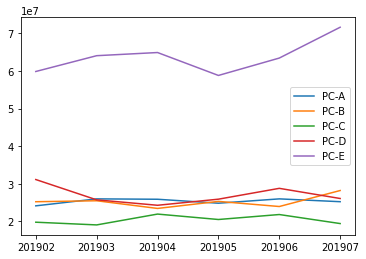

In [65]:
plt.plot(list(graph_data.index), graph_data['PC-A'],label='PC-A')
plt.plot(list(graph_data.index), graph_data['PC-B'],label='PC-B')
plt.plot(list(graph_data.index), graph_data['PC-C'],label='PC-C')
plt.plot(list(graph_data.index), graph_data['PC-D'],label='PC-D')
plt.plot(list(graph_data.index), graph_data['PC-E'],label='PC-E')
plt.legend()

### 1,2 행은 matplotlib을 임포트하는 코드입니다.
- 3-7행 까지는 상품마다 그래프를 그리고 8행은 범례를 표시합니다.